### ITAD-315 Discrete Math - Fall 2025
## Lesson 8

## Activity 1

Pseudo Random Number Generator (PRNG)


Final Generated Sequence: [0, 11, 19, 6, 7, 14, 17, 15, 1, 18, 22, 4, 16, 8, 21, 20, 13, 10, 12, 3, 9, 5, 0, 11, 19, 6, 7, 14, 17, 15, 1, 18, 22, 4, 16, 8, 21, 20, 13, 10, 12, 3, 9, 5, 0, 11, 19, 6, 7, 14, 17, 15, 1, 18, 22, 4, 16, 8, 21, 20, 13, 10, 12, 3, 9, 5, 0, 11, 19, 6, 7, 14, 17, 15, 1, 18, 22, 4, 16, 8, 21, 20, 13, 10, 12, 3, 9, 5, 0, 11, 19, 6, 7, 14, 17, 15, 1, 18, 22, 4, 16, 8, 21, 20, 13, 10, 12, 3, 9, 5, 0, 11, 19, 6, 7]


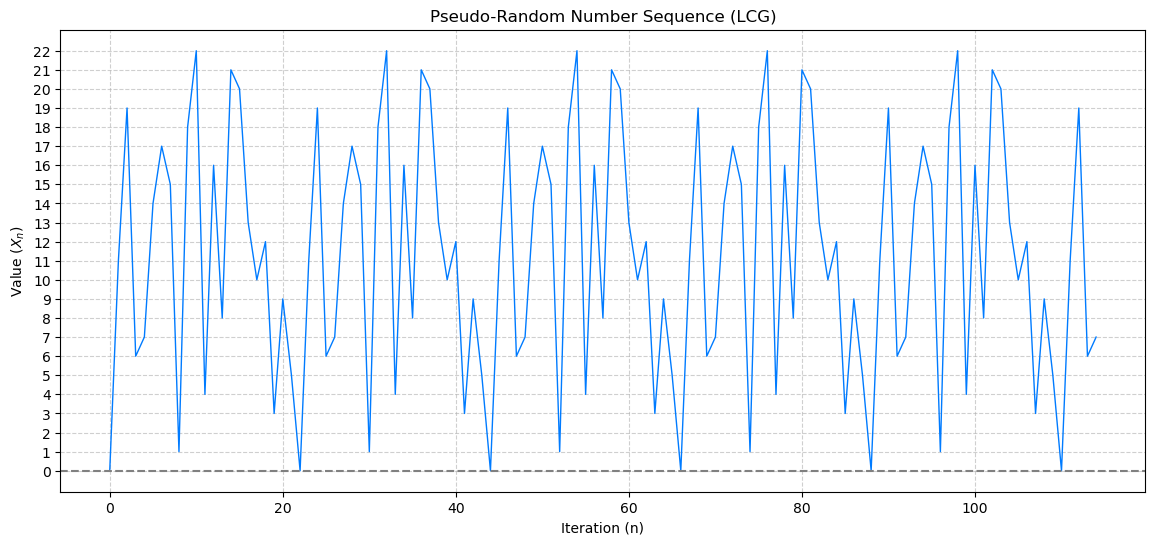

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linear_congruential_generator(m, a, c, x0):   
    max_iterations = 5*m
    sequence = []
    x = x0
    for _ in range(max_iterations):
        x = (a * x + c) % m   # LCG formula
        sequence.append(x)
    return sequence

def plot_lcg_sequence(sequence):
    samples_to_plot = sequence#[:100]
    indices = list(range(len(samples_to_plot)))

    plt.figure(figsize=(14, 6))
    plt.plot(indices, samples_to_plot, linestyle='-', color='#007BFF', linewidth=1)
    
    plt.title('Pseudo-Random Number Sequence (LCG)')
    plt.xlabel('Iteration (n)')
    plt.ylabel(f'Value ($X_n$)')
    
    # Set the y-axis ticks to match the modulus range [0, m-1]
    m_val = max(samples_to_plot) + 1 # Assumes max value is m-1
    plt.yticks(range(m_val))
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.show()

m = 23  # Modulus
a = 7   # Multiplier
c = 11   # Increment
x0 = 5  # Initial Seed

generated_sequence = linear_congruential_generator(m, a, c, x0)
print(f"\nFinal Generated Sequence: {generated_sequence}")
plot_lcg_sequence(generated_sequence)

## Question: Is the signal periodic?

### **Method:** Autocorrelation Function (ACF)

One robust method for determining the periodicity of a discrete-time signal or time series is by examining its Autocorrelation Function (ACF).

The theoretical definition of the autocorrelation function, $R(i)$, for a discrete sequence $x(n)$ is:$$R(i) = \sum_{n} x(n) \cdot x(n-i)$$A signal is considered periodic if the ACF exhibits strong, regular peaks corresponding to the period.

**Practical Implementation**

You can easily calculate the ACF using the `acf()` function available in the `statsmodels.tsa.stattools` library in Python, which gives it the normalized value of $R$ by $R(0)$, so that the first element is always equal $1$.

Note that this is one way of determining the periodicity; there are other, maybe even simpler methods, as well.


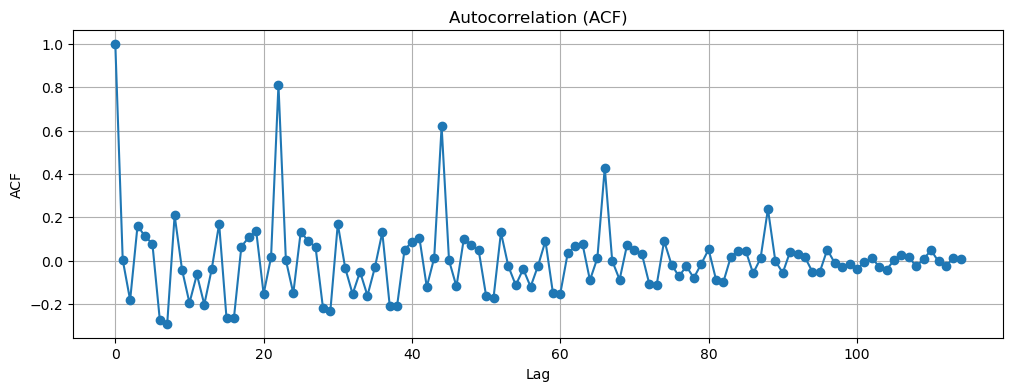

|   Lag (i) |   ACF Value |
|----------:|------------:|
|         0 |      1.0000 |
|         1 |      0.0043 |
|         2 |     -0.1817 |
|         3 |      0.1620 |
|         4 |      0.1122 |
|         5 |      0.0787 |
|         6 |     -0.2719 |
|         7 |     -0.2904 |
|         8 |      0.2088 |
|         9 |     -0.0416 |
|        10 |     -0.1946 |
|        11 |     -0.0635 |
|        12 |     -0.2019 |
|        13 |     -0.0391 |
|        14 |      0.1699 |
|        15 |     -0.2663 |
|        16 |     -0.2621 |
|        17 |      0.0653 |
|        18 |      0.1077 |
|        19 |      0.1363 |
|        20 |     -0.1526 |
|        21 |      0.0149 |
|        22 |      0.8096 |
|        23 |      0.0028 |
|        24 |     -0.1503 |


In [2]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import pandas as pd

# Use the length of the generated sequence
acf_values = acf(generated_sequence, nlags=len(generated_sequence)-1)

plt.figure(figsize=(12,4))
plt.plot(acf_values, marker='o')
plt.title("Autocorrelation (ACF)")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

acf_df = pd.DataFrame(
    {'ACF Value': acf_values}, 
    index=pd.RangeIndex(start=0, stop=len(acf_values), name='Lag (i)')
)

print(acf_df.head(25).to_markdown(floatfmt=".4f"))

### Numeric value of the period

- Let's check the exact period of the sequence.

In [3]:
print(acf_df.head(25).to_markdown(index=True, floatfmt=".4f"))

|   Lag (i) |   ACF Value |
|----------:|------------:|
|         0 |      1.0000 |
|         1 |      0.0043 |
|         2 |     -0.1817 |
|         3 |      0.1620 |
|         4 |      0.1122 |
|         5 |      0.0787 |
|         6 |     -0.2719 |
|         7 |     -0.2904 |
|         8 |      0.2088 |
|         9 |     -0.0416 |
|        10 |     -0.1946 |
|        11 |     -0.0635 |
|        12 |     -0.2019 |
|        13 |     -0.0391 |
|        14 |      0.1699 |
|        15 |     -0.2663 |
|        16 |     -0.2621 |
|        17 |      0.0653 |
|        18 |      0.1077 |
|        19 |      0.1363 |
|        20 |     -0.1526 |
|        21 |      0.0149 |
|        22 |      0.8096 |
|        23 |      0.0028 |
|        24 |     -0.1503 |


### Look for the numbers there

- The period appears to be 22, but $m$ is 23? 
- Which number is missing?
- Can you explain why that number is missing?

In [4]:
df = pd.DataFrame({'x': generated_sequence})

print(
    df.value_counts()
      .sort_index()
)

x 
0     6
1     5
3     5
4     5
5     5
6     6
7     6
8     5
9     5
10    5
11    6
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    6
20    5
21    5
22    5
Name: count, dtype: int64


# Assignment: Hamming Code

**Objective:** To understand and apply Error Correcting Codes in Communication Systems.

[**Hamming Code**](https://en.wikipedia.org/wiki/Hamming_code) is able to detect one-bit and two-bit errors, or correct one-bit errors without detection of uncorrected errors. In 1950, Richard Hamming, while working at Bell Labs, published what is now known as Hamming code, which remains in use today in applications such as memory and hard disk error correction.

<center>
<img src="https://upload.wikimedia.org/wikipedia/en/0/08/Richard_Hamming.jpg" width="200" alt="Visualization of the Self-Organizing Map training process">
</center>

### Implement Hamming Code (7, 4)
- First, implement the Hamming Code with $n=4$ and $r=3$.
- Then, simulate a simple memory-less binary communication channel with $p$ as the probability of flipping a bit.
- For different values of $p$, simulate the transmission with the Hamming Code error correction in place and observe the error rate at the reception.
- Plot your observed error rate versus the different values of $p$

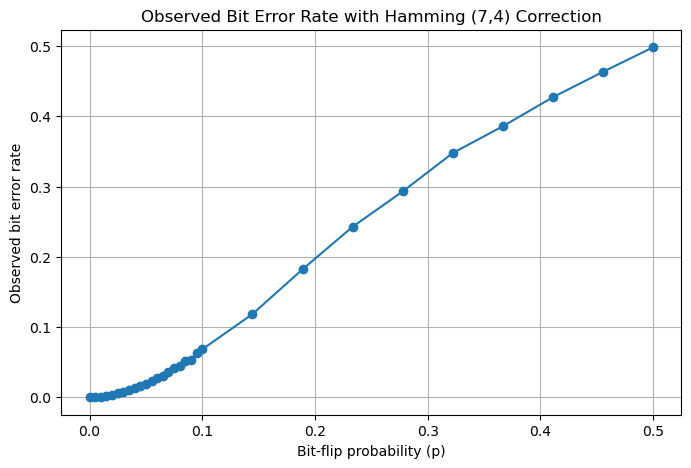

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# Hamming (7,4) Encoding Function
# -------------------------------------------------------------
def hamming_encode(data_bits):
    d1, d2, d3, d4 = data_bits
    p1 = d1 ^ d2 ^ d4
    p2 = d1 ^ d3 ^ d4
    p3 = d2 ^ d3 ^ d4
    return [p1, p2, d1, p3, d2, d3, d4]

# -------------------------------------------------------------
# Hamming (7,4) Decoding Function with Single-Bit Correction
# -------------------------------------------------------------
def hamming_decode(codeword):
    p1, p2, d1, p3, d2, d3, d4 = codeword
    s1 = p1 ^ d1 ^ d2 ^ d4
    s2 = p2 ^ d1 ^ d3 ^ d4
    s3 = p3 ^ d2 ^ d3 ^ d4
    syndrome = s1*1 + s2*2 + s3*4

    if syndrome != 0:
        codeword[syndrome - 1] ^= 1

    data_bits = [codeword[2], codeword[4], codeword[5], codeword[6]]
    return data_bits

# -------------------------------------------------------------
# Noisy Channel Simulation
# -------------------------------------------------------------
def transmit_through_channel(codeword, p):
    return [bit ^ (np.random.rand() < p) for bit in codeword]

# -------------------------------------------------------------
# Improved p-resolution
# -------------------------------------------------------------
probabilities = np.concatenate([
    np.linspace(0, 0.1, 20, endpoint=False),   # finer resolution in low-error region
    np.linspace(0.1, 0.5, 10)                  # normal resolution afterwards
])

trials = 10000
error_rates = []

# -------------------------------------------------------------
# Monte Carlo Simulation
# -------------------------------------------------------------
for p in probabilities:
    bit_errors = 0  # count bit-level errors (not segment errors)
    total_bits = 0

    for _ in range(trials):
        data = np.random.randint(0, 2, 4).tolist()
        code = hamming_encode(data)
        received = transmit_through_channel(code, p)
        decoded = hamming_decode(received)

        # -------------------------------------------------------------
        # Count total altered bits instead of wrong codewords
        # -------------------------------------------------------------
        bit_errors += sum([decoded[i] != data[i] for i in range(4)])
        total_bits += 4

    error_rates.append(bit_errors / total_bits)

# -------------------------------------------------------------
# Plot Results
# -------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(probabilities, error_rates, marker='o')
plt.title("Observed Bit Error Rate with Hamming (7,4) Correction")
plt.xlabel("Bit-flip probability (p)")
plt.ylabel("Observed bit error rate")
plt.grid(True)
plt.show()


### Reflection and Conclusion

The Hamming (7,4) code provides a foundational example of how digital communication systems protect information from transmission errors. By adding three parity bits to four data bits, the code creates a structure capable of identifying and correcting any single-bit error that occurs during transmission. This assignment allowed me to examine how effectively this error-correcting capability performs when exposed to different levels of noise in a binary symmetric channel.

The simulation introduced controlled channel distortion through a bit-flip probability 
𝑝
p, which represents the likelihood that any transmitted bit will be inverted during transmission. At low values of 
𝑝
p, the Hamming Code performs exceptionally well: the observed bit-error rate was near zero, demonstrating its reliability when errors are isolated and infrequent. This is consistent with the design of the code, which guarantees correction of exactly one erroneous bit per 7-bit codeword.

As the probability of distortion increases, however, the limitations of the Hamming Code become increasingly visible. When 
𝑝
p reaches a level where multiple bits within a single codeword are likely to flip, the code can no longer guarantee correct decoding. The bit-error rate rises accordingly because the code is only capable of detecting—but not correcting—two-bit errors, and errors involving three or more bits may even mimic valid codewords or corrupt the data without detection. The refined 
𝑝
p-resolution in this simulation was especially important for capturing the subtle transition between the low-error and high-error regimes, offering a clearer understanding of the code’s performance envelope.

Finally, shifting the error-counting method to track bit-level differences rather than whole-block mismatches provided a more accurate representation of the system’s behavior. This granularity allowed the results to more closely reflect real-world communication scenarios, where individual bit errors—not just block-level failures—contribute to overall system degradation.

Overall, the simulation illustrates both the value and boundaries of the Hamming (7,4) code in the presence of channel distortion. While it demonstrates strong performance under light noise, its protective capabilities diminish once the channel introduces errors beyond the single-bit threshold it was designed to correct. This experiment reinforces the importance of selecting appropriate error-correcting codes based on the noise characteristics of the communication environment.

# Statement on the use of AI

In this section disclose your use of AI. 

Make sure to include:
- **name of AI tool** you used (Gemini, chatGPT, Perplexity, Grok, etc.)
- The **prompt(s)** used (if you have used several prompts, just give the most important ones here)
- Explain whether you used the the output of AI **directly** or **after modification**

Please note that while using AI for brainstorming, enhancing your work, or fixing bugs is permitted, a blunt use of AI to solve the entire problem is **prohibited**.

I completed this assignment independently without the use of any AI tools.
All ideas and work presented here are entirely my own.